### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import models
import matplotlib.pyplot as plt
import json

### Importing Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DL/dataset/G_train.csv', infer_datetime_format=True,
                parse_dates={'dt' : ['Unnamed: 0']},
                 index_col='dt')

In [3]:
df2 = pd.read_csv('/content/drive/MyDrive/DL/dataset/G_test.csv', infer_datetime_format=True,
                parse_dates={'dt' : ['Unnamed: 0']},
                 index_col='dt')

### Initial Pre-processing

In [4]:
train_data = np.asarray(df)
test_data = np.asarray(df2)

In [5]:
train_data.shape

(5247, 12)

In [6]:
hell = train_data[len(train_data)-24:].tolist()

In [7]:
with open("sample_g.json", "w") as outfile:
    json.dump(hell, outfile)

In [8]:
def create_training_sequence(data, sequence_length, step_size):
    sequences = []
    targets = []
    for i in range(0, len(data) - sequence_length-step_size):
        seq = data[i:i+sequence_length]
        target = data[i+sequence_length:i + sequence_length + step_size, 11]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [9]:
def create_test_sequence(data, sequence_length, step_size):
    hell = train_data[len(train_data)-sequence_length:].tolist()
    well = test_data[:step_size, 11].tolist()
    a = hell.copy()
    b = well.copy()
    sequences = [a.copy()]
    targets = [b.copy()]
    for i in range(0, len(data) - step_size):
        a.append(data[i].tolist())
        a.pop(0)
        b.append(data[i+step_size, 11].tolist())
        b.pop(0)
        sequences.append(a.copy())
        targets.append(b.copy())
    return np.array(sequences), np.array(targets)

### Step-size: 1

#### Pre-processing

In [10]:
time_step_1 = 1
sequence_length_1 = 24
X_train_1, y_train_1 = create_training_sequence(train_data, sequence_length_1, time_step_1)

In [11]:
X_train_1.shape, y_train_1.shape

((5222, 24, 12), (5222, 1))

In [12]:
X_test_1, y_test_1 = create_test_sequence(test_data, sequence_length_1, time_step_1)

In [13]:
X_test_1.shape, y_test_1.shape

((1289, 24, 12), (1289, 1))

#### Training the model

In [20]:
model_1 = Sequential()
model_1.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_1, X_train_1.shape[2])))
model_1.add(Dropout(0.2))
model_1.add(Dense(units=time_step_1))

In [21]:
model_1.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model_1.fit(X_train_1, y_train_1, epochs=50, batch_size=32)

Epoch 1/50
164/164 [==============================] - 4s 13ms/step - loss: 1232.8302
Epoch 2/50
164/164 [==============================] - 3s 21ms/step - loss: 410.1115
Epoch 3/50
164/164 [==============================] - 3s 20ms/step - loss: 289.2391
Epoch 4/50
164/164 [==============================] - 3s 16ms/step - loss: 249.7175
Epoch 5/50
164/164 [==============================] - 2s 13ms/step - loss: 257.2815
Epoch 6/50
164/164 [==============================] - 2s 13ms/step - loss: 236.5473
Epoch 7/50
164/164 [==============================] - 2s 13ms/step - loss: 215.9327
Epoch 8/50
164/164 [==============================] - 2s 13ms/step - loss: 277.1737
Epoch 9/50
164/164 [==============================] - 3s 19ms/step - loss: 718.3248
Epoch 10/50
164/164 [==============================] - 3s 20ms/step - loss: 502.0832
Epoch 11/50
164/164 [==============================] - 3s 17ms/step - loss: 380.7962
Epoch 12/50
164/164 [==============================] - 2s 13ms/step - los

#### Testing the mode

In [23]:
y_pred_1 = model_1.predict(X_test_1)

41/41 [==============================] - 1s 8ms/step


In [24]:
y_test_1.shape, y_pred_1.shape

((1289, 1), (1289, 1))

In [25]:
mse_1 = mean_squared_error(y_test_1, y_pred_1)
mae_1 = mean_absolute_error(y_test_1, y_pred_1)

In [26]:
print(f'Mean Squared Error: {mse_1}')
print(f'Mean Absolute Error: {mae_1}')

Mean Squared Error: 69.7389385051649
Mean Absolute Error: 5.718678518077771


#### Visualizing y_pred vs y_test

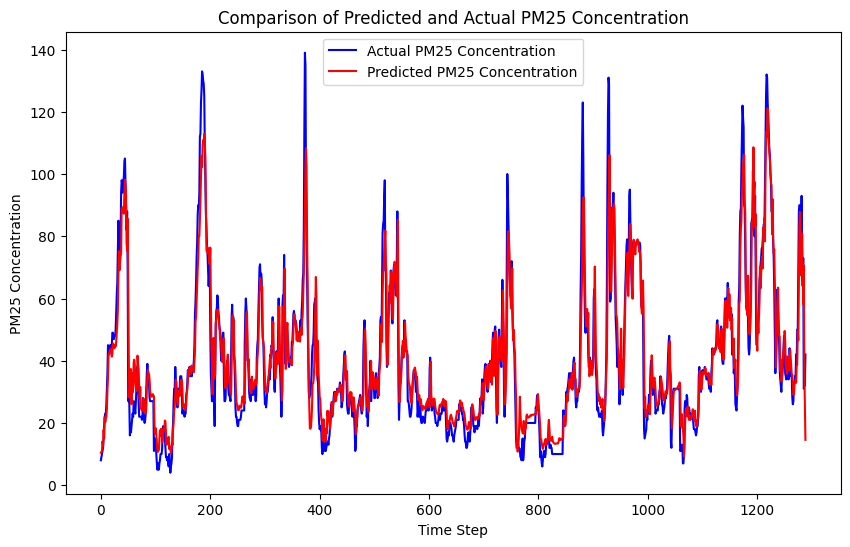

In [27]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_1, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_1, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [28]:
model_1.save("/content/drive/MyDrive/DL/G_model_1")

In [29]:
loaded_model_1 = models.load_model("/content/drive/MyDrive/DL/G_model_1")

### Step-size: 7

#### Pre-processing

In [30]:
time_step_7 = 7
sequence_length_7 = 24
X_train_7, y_train_7 = create_training_sequence(train_data, sequence_length_7, time_step_7)

In [31]:
X_train_7.shape, y_train_7.shape

((5216, 24, 12), (5216, 7))

In [32]:
X_test_7, y_test_7 = create_test_sequence(test_data, sequence_length_7, time_step_7)

In [33]:
X_test_7.shape, y_test_7.shape

((1283, 24, 12), (1283, 7))

#### Training the model

In [34]:
model_7 = Sequential()
model_7.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_7, X_train_7.shape[2])))
model_7.add(Dropout(0.2))
model_7.add(Dense(units=time_step_7))
model_7.compile(optimizer='adam', loss='mean_squared_error')
model_7.fit(X_train_7, y_train_7, epochs=100, batch_size=32)

Epoch 1/100
163/163 [==============================] - 5s 15ms/step - loss: 2770.4031
Epoch 2/100
163/163 [==============================] - 2s 10ms/step - loss: 1651.8882
Epoch 3/100
163/163 [==============================] - 2s 10ms/step - loss: 1055.0243
Epoch 4/100
163/163 [==============================] - 2s 10ms/step - loss: 850.2777
Epoch 5/100
163/163 [==============================] - 2s 10ms/step - loss: 692.5902
Epoch 6/100
163/163 [==============================] - 2s 10ms/step - loss: 693.1208
Epoch 7/100
163/163 [==============================] - 2s 10ms/step - loss: 680.9775
Epoch 8/100
163/163 [==============================] - 2s 12ms/step - loss: 696.8348
Epoch 9/100
163/163 [==============================] - 2s 15ms/step - loss: 670.5114
Epoch 10/100
163/163 [==============================] - 2s 15ms/step - loss: 666.1475
Epoch 11/100
163/163 [==============================] - 2s 14ms/step - loss: 663.5001
Epoch 12/100
163/163 [==============================] - 2s 1

#### Testing the model

In [35]:
y_pred_7 = model_7.predict(X_test_7)

41/41 [==============================] - 0s 6ms/step


In [36]:
y_test_7.shape, y_pred_7.shape

((1283, 7), (1283, 7))

In [37]:
mse_7 = mean_squared_error(y_test_7, y_pred_7)
mae_7 = mean_absolute_error(y_test_7, y_pred_7)

In [38]:
print(f'Mean Squared Error: {mse_7}')
print(f'Mean Absolute Error: {mae_7}')

Mean Squared Error: 272.4485921334055
Mean Absolute Error: 11.519846253904253


#### Visualizing y_pred vs y_test

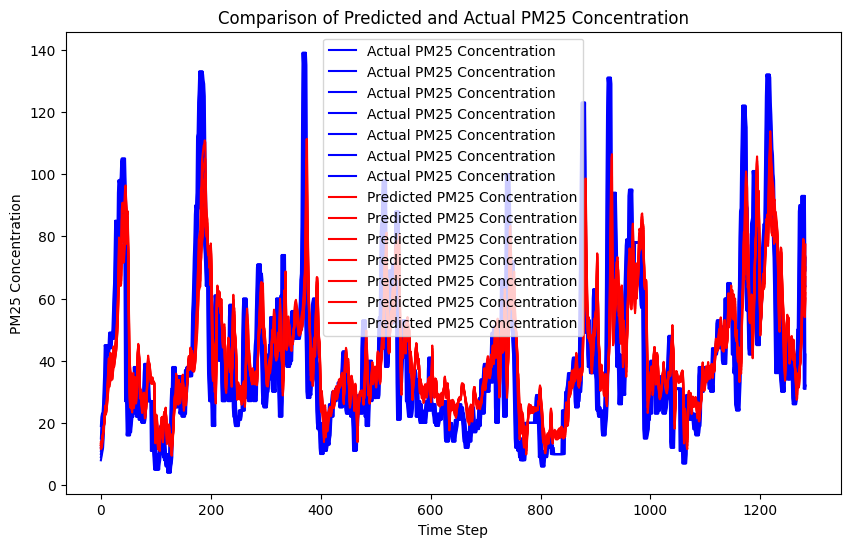

In [40]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_7, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_7, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [41]:
model_7.save("/content/drive/MyDrive/DL/G_model_7")

In [42]:
loaded_model_7 = models.load_model("/content/drive/MyDrive/DL/G_model_7")

### Step-size: 14

#### Pre-processing

In [43]:
time_step_14 = 14
sequence_length_14 = 24
X_train_14, y_train_14 = create_training_sequence(train_data, sequence_length_14, time_step_14)

In [44]:
X_train_14.shape, y_train_14.shape

((5209, 24, 12), (5209, 14))

In [45]:
X_test_14, y_test_14 = create_test_sequence(test_data, sequence_length_14, time_step_14)

In [46]:
X_test_14.shape, y_test_14.shape

((1276, 24, 12), (1276, 14))

#### Training the model

In [48]:
model_14 = Sequential()
model_14.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_14, X_train_14.shape[2])))
model_14.add(Dropout(0.2))
model_14.add(Dense(units=time_step_14))
model_14.compile(optimizer='adam', loss='mean_squared_error')
model_14.fit(X_train_14, y_train_14, epochs=40, batch_size=32)

Epoch 1/40
163/163 [==============================] - 4s 18ms/step - loss: 1700.5232
Epoch 2/40
163/163 [==============================] - 3s 20ms/step - loss: 653.6287
Epoch 3/40
163/163 [==============================] - 3s 18ms/step - loss: 564.9184
Epoch 4/40
163/163 [==============================] - 2s 12ms/step - loss: 535.0352
Epoch 5/40
163/163 [==============================] - 2s 12ms/step - loss: 506.4367
Epoch 6/40
163/163 [==============================] - 2s 12ms/step - loss: 481.7967
Epoch 7/40
163/163 [==============================] - 2s 12ms/step - loss: 477.1472
Epoch 8/40
163/163 [==============================] - 2s 15ms/step - loss: 463.0366
Epoch 9/40
163/163 [==============================] - 3s 19ms/step - loss: 454.7462
Epoch 10/40
163/163 [==============================] - 3s 20ms/step - loss: 438.7414
Epoch 11/40
163/163 [==============================] - 2s 14ms/step - loss: 440.8457
Epoch 12/40
163/163 [==============================] - 2s 13ms/step - los

#### Testing the model

In [49]:
y_pred_14 = model_14.predict(X_test_14)

40/40 [==============================] - 1s 7ms/step


In [50]:
y_test_14.shape, y_pred_14.shape

((1276, 14), (1276, 14))

In [51]:
mse_14 = mean_squared_error(y_test_14, y_pred_14)
mae_14 = mean_absolute_error(y_test_14, y_pred_14)

In [52]:
print(f'Mean Squared Error: {mse_14}')
print(f'Mean Absolute Error: {mae_14}')

Mean Squared Error: 377.8469970006502
Mean Absolute Error: 13.005623942552209


#### Visualizing y_pred vs y_test

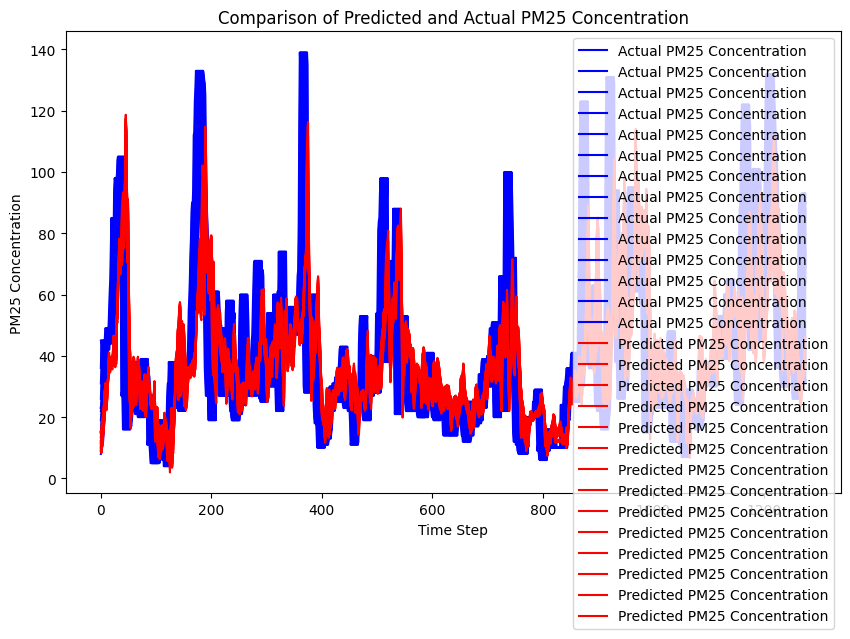

In [53]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_14, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_14, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [54]:
model_14.save("/content/drive/MyDrive/DL/G_model_14")

In [55]:
loaded_model_14 = models.load_model("/content/drive/MyDrive/DL/G_model_14")

### Step-size: 30

#### Pre-processing

In [56]:
time_step_30 = 30
sequence_length_30 = 24
X_train_30, y_train_30 = create_training_sequence(train_data, sequence_length_30, time_step_30)

In [57]:
X_train_30.shape, y_train_30.shape

((5193, 24, 12), (5193, 30))

In [58]:
X_test_30, y_test_30 = create_test_sequence(test_data, sequence_length_30, time_step_30)

In [59]:
X_test_30.shape, y_test_30.shape

((1260, 24, 12), (1260, 30))

#### Training the model

In [64]:
model_30= Sequential()
model_30.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_30, X_train_30.shape[2])))
model_30.add(Dropout(0.2))
model_30.add(Dense(units=time_step_30))
model_30.compile(optimizer='adam', loss='mean_squared_error')
model_30.fit(X_train_30, y_train_30, epochs=100, batch_size=32)

Epoch 1/100
163/163 [==============================] - 3s 13ms/step - loss: 1944.7642
Epoch 2/100
163/163 [==============================] - 3s 20ms/step - loss: 806.3423
Epoch 3/100
163/163 [==============================] - 3s 20ms/step - loss: 719.6757
Epoch 4/100
163/163 [==============================] - 3s 16ms/step - loss: 776.5734
Epoch 5/100
163/163 [==============================] - 2s 12ms/step - loss: 750.0248
Epoch 6/100
163/163 [==============================] - 2s 12ms/step - loss: 662.4590
Epoch 7/100
163/163 [==============================] - 2s 12ms/step - loss: 692.0999
Epoch 8/100
163/163 [==============================] - 2s 12ms/step - loss: 689.6519
Epoch 9/100
163/163 [==============================] - 3s 17ms/step - loss: 660.1885
Epoch 10/100
163/163 [==============================] - 3s 20ms/step - loss: 621.0687
Epoch 11/100
163/163 [==============================] - 3s 18ms/step - loss: 607.3491
Epoch 12/100
163/163 [==============================] - 2s 12m

#### Testing the model

In [65]:
y_pred_30 = model_30.predict(X_test_30)

40/40 [==============================] - 0s 5ms/step


In [66]:
y_test_30.shape, y_pred_30.shape

((1260, 30), (1260, 30))

In [67]:
mse_30 = mean_squared_error(y_test_30, y_pred_30)
mae_30 = mean_absolute_error(y_test_30, y_pred_30)

In [68]:
print(f'Mean Squared Error: {mse_30}')
print(f'Mean Absolute Error: {mae_30}')

Mean Squared Error: 481.98117388324516
Mean Absolute Error: 14.985334630946001


#### Visualizing y_pred vs y_test

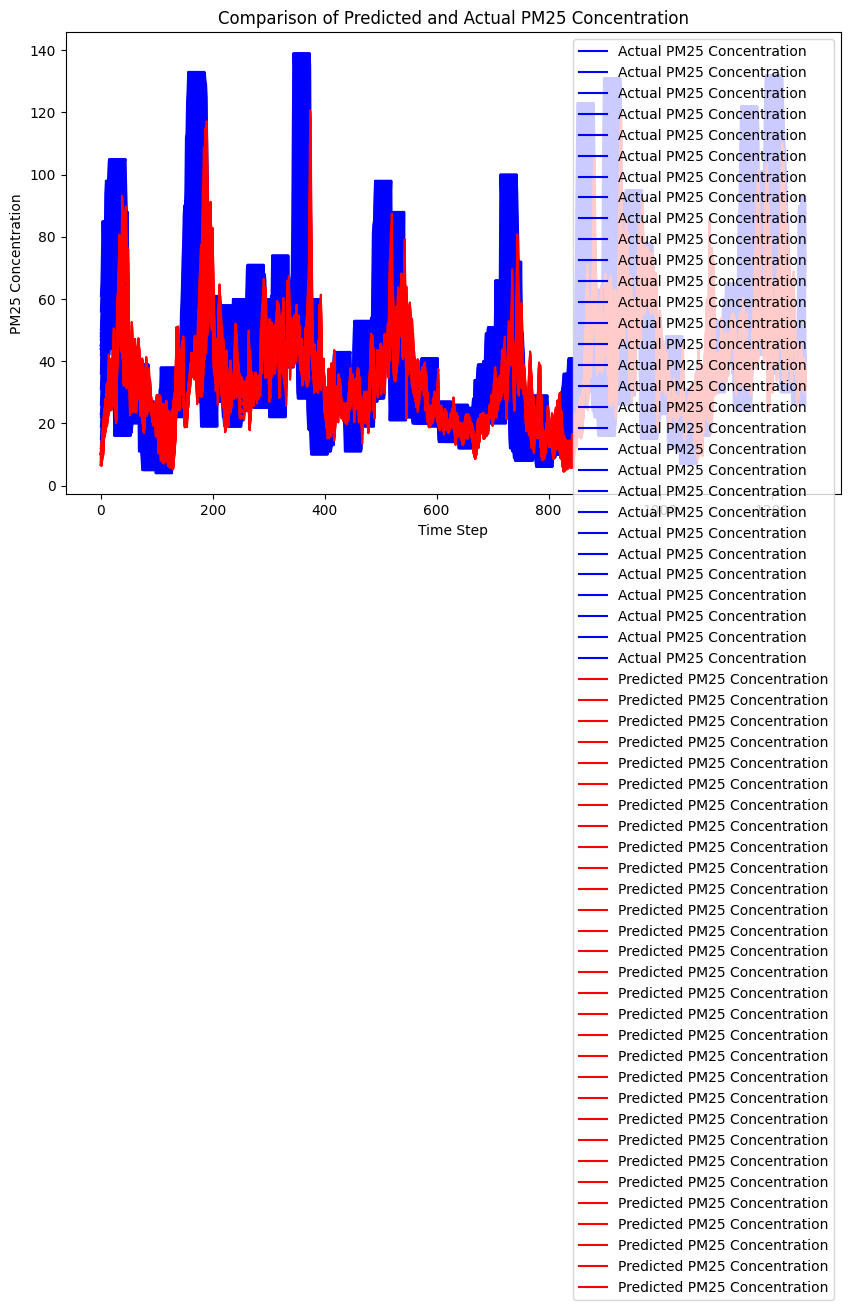

In [69]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_30, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_30, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [70]:
model_30.save("/content/drive/MyDrive/DL/G_model_30")

In [71]:
loaded_model_30 = models.load_model("/content/drive/MyDrive/DL/G_model_30")

### Step-size: 60

#### Pre-processing

In [72]:
time_step_60 = 60
sequence_length_60 = 24
X_train_60, y_train_60 = create_training_sequence(train_data, sequence_length_60, time_step_60)

In [73]:
X_train_60.shape, y_train_60.shape

((5163, 24, 12), (5163, 60))

In [74]:
X_test_60, y_test_60 = create_test_sequence(test_data, sequence_length_60, time_step_60)

In [75]:
X_test_60.shape, y_test_60.shape

((1230, 24, 12), (1230, 60))

#### Training the model

In [77]:
model_60 = Sequential()
model_60.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_60, X_train_60.shape[2])))
model_60.add(Dropout(0.2))
model_60.add(Dense(units=time_step_60))
model_60.compile(optimizer='adam', loss='mean_squared_error')
model_60.fit(X_train_60, y_train_60, epochs=30, batch_size=32)

Epoch 1/30
162/162 [==============================] - 3s 12ms/step - loss: 2196.4663
Epoch 2/30
162/162 [==============================] - 2s 12ms/step - loss: 1355.8940
Epoch 3/30
162/162 [==============================] - 2s 12ms/step - loss: 1214.1547
Epoch 4/30
162/162 [==============================] - 2s 15ms/step - loss: 1059.0103
Epoch 5/30
162/162 [==============================] - 3s 19ms/step - loss: 945.2327
Epoch 6/30
162/162 [==============================] - 3s 20ms/step - loss: 905.7667
Epoch 7/30
162/162 [==============================] - 3s 16ms/step - loss: 887.9652
Epoch 8/30
162/162 [==============================] - 2s 12ms/step - loss: 858.8876
Epoch 9/30
162/162 [==============================] - 2s 13ms/step - loss: 865.3331
Epoch 10/30
162/162 [==============================] - 2s 12ms/step - loss: 863.7815
Epoch 11/30
162/162 [==============================] - 2s 12ms/step - loss: 823.1262
Epoch 12/30
162/162 [==============================] - 3s 16ms/step - 

#### Testing the model

In [78]:
y_pred_60 = model_60.predict(X_test_60)

39/39 [==============================] - 0s 5ms/step


In [79]:
y_test_60.shape, y_pred_60.shape

((1230, 60), (1230, 60))

In [80]:
mse_60 = mean_squared_error(y_test_60, y_pred_60)
mae_60 = mean_absolute_error(y_test_60, y_pred_60)

In [81]:
print(f'Mean Squared Error: {mse_60}')
print(f'Mean Absolute Error: {mae_60}')

Mean Squared Error: 610.1883062966467
Mean Absolute Error: 19.036128567912712


#### Visualizing y_pred vs y_test

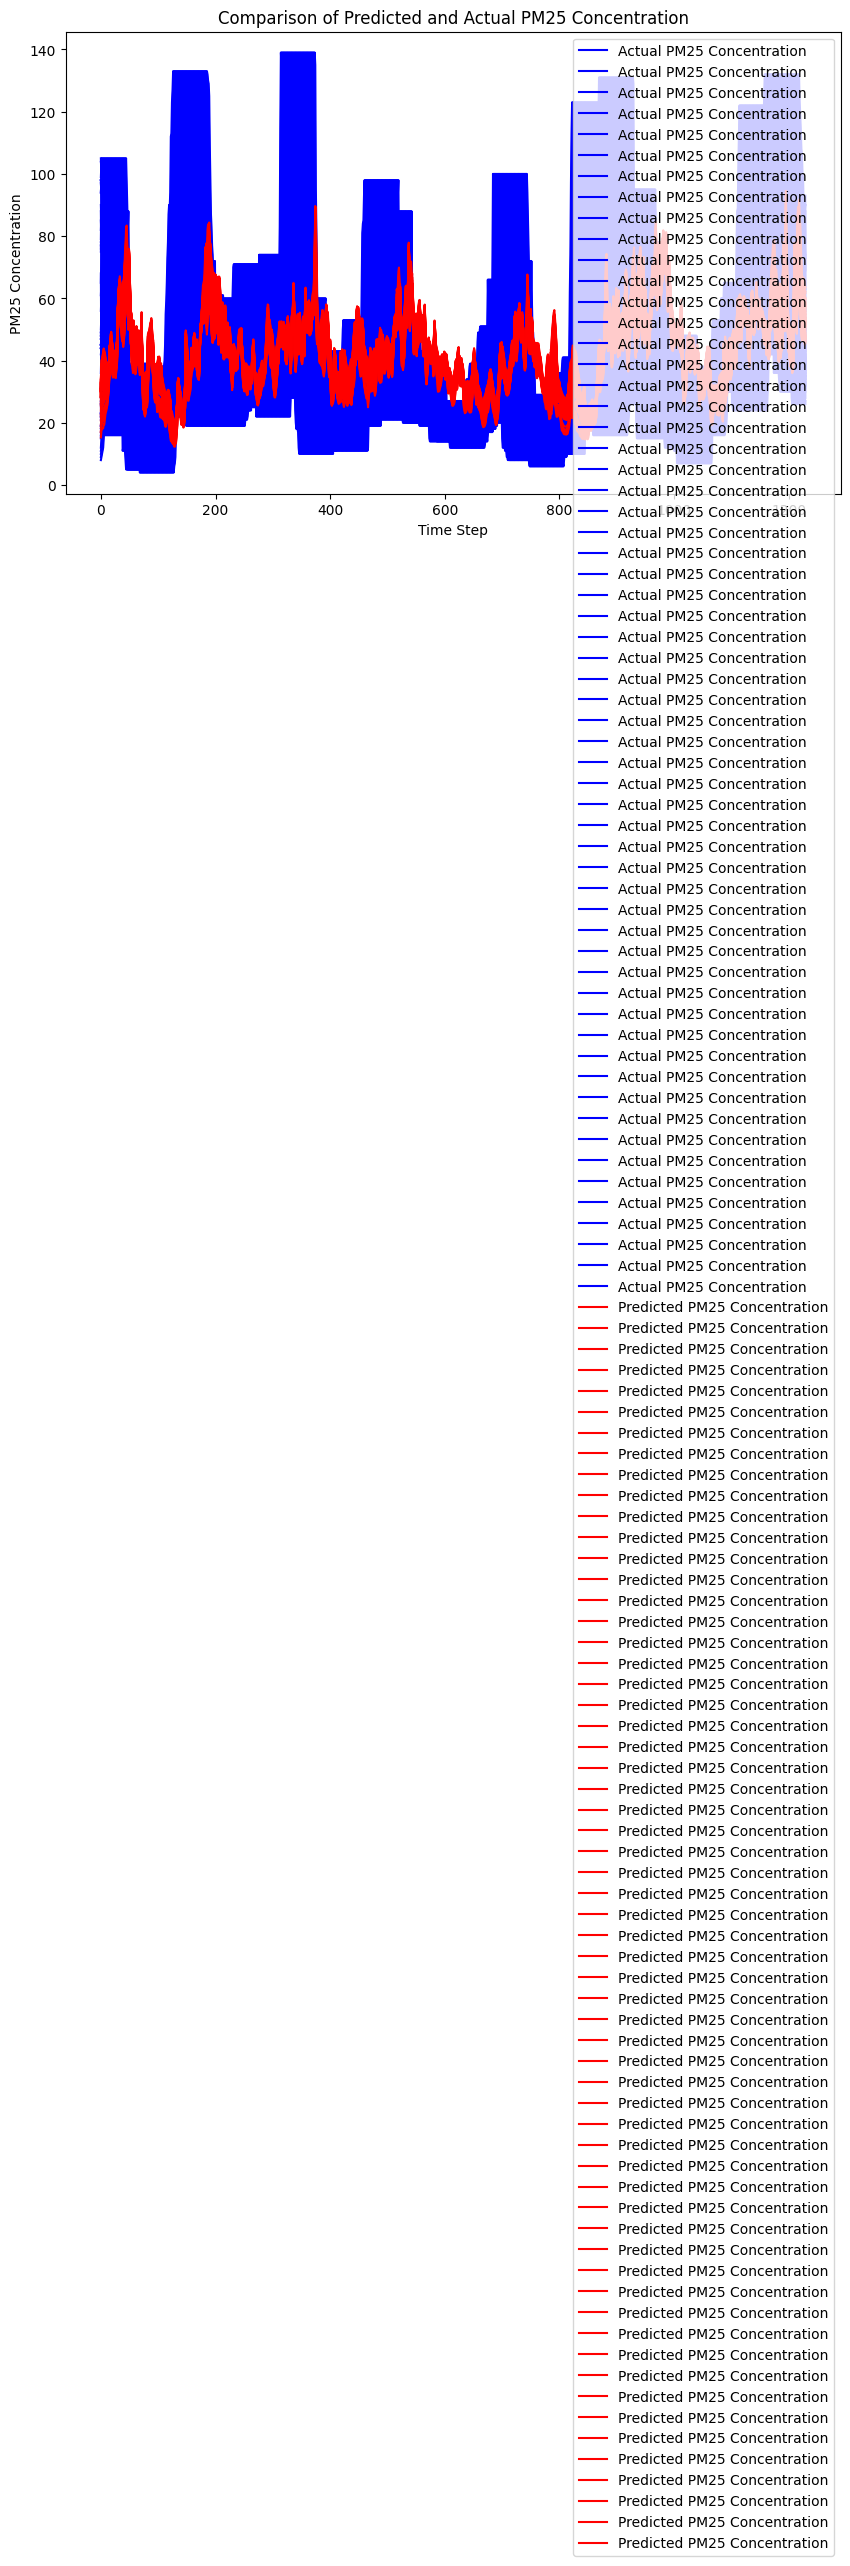

In [82]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_60, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_60, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [83]:
model_60.save("/content/drive/MyDrive/DL/G_model_60")

In [84]:
loaded_model_60 = models.load_model("/content/drive/MyDrive/DL/G_model_60")